### General exploration of the datasets

In order to get a better understanding of the data we will be looking at, let's take a look at some of the characteristics of the datasets.

In [1]:
# import libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t

In [2]:
df_calendar = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [3]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### Questions to be answered

We will try to solve the following questions:

What are the ratings and prices of different locations in Seattle?

How well can we predict a property's price? What aspects correlate well to price?

How well can we predict a property's availability? What aspects correlate well to availability?

### What are the ratings and prices of different locations in Seattle?

First, I will analyze some columns related with location:

In [9]:
df_listings[["host_location", "host_neighbourhood", "neighbourhood", "neighbourhood_cleansed", "neighbourhood_group_cleansed"]]

,host_location,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,"Seattle, Washington, United States",Queen Anne,Queen Anne,West Queen Anne,Queen Anne
1,"Seattle, Washington, United States",Queen Anne,Queen Anne,West Queen Anne,Queen Anne
2,"Seattle, Washington, United States",Queen Anne,Queen Anne,West Queen Anne,Queen Anne
3,"Seattle, Washington, United States",Queen Anne,Queen Anne,West Queen Anne,Queen Anne
4,"Seattle, Washington, United States",Queen Anne,Queen Anne,West Queen Anne,Queen Anne
...,...,...,...,...,...
3813,US,Holly,Fremont,Fremont,Other neighborhoods
3814,"Seattle, Washington, United States",Portage Bay,Portage Bay,Portage Bay,Capitol Hill
3815,US,NaN,NaN,Rainier Beach,Rainier Valley
3816,"Tacoma, Washington, United States",NaN,NaN,Madison Park,Capitol Hill


In [10]:
df_listings.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [11]:
df_listings.neighbourhood_cleansed.value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

We will use the neighbourhood_group_cleansed, because it has less values, and it will be easier to visualize.

In [12]:
#Checking if the neighbourhood_group_cleansed column has null values
df_listings['neighbourhood_group_cleansed'].isnull().mean()

0.0

In [13]:
#Checking if the price column has null values
df_listings['price'].isnull().mean()

0.0

In [14]:
#Checking the columns with reviews

df_listings[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...
3813,80.0,8.0,10.0,4.0,8.0,10.0,8.0
3814,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Checking if review_scores_rating has null values

df_listings['review_scores_rating'].isnull().mean()

0.16946045049764275

In [16]:
df_listings.groupby(['neighbourhood_group_cleansed'])

In [17]:
df_listings['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [18]:
#changing price from string to float
df_listings['price'] = df_listings['price'].str.replace("$", "")

/var/folders/6w/mqsftc_d4ns8fl0kcnv5h9hh0000gn/T/ipykernel_23701/3920661810.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['price'] = df_listings['price'].str.replace("$", "")


In [19]:
df_listings['price'] = df_listings['price'].str.replace(",", "")
df_listings['price'] = df_listings['price'].astype(float)

In [20]:
df_listings['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [21]:
df_listings.groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values(ascending=False)

/var/folders/6w/mqsftc_d4ns8fl0kcnv5h9hh0000gn/T/ipykernel_23701/1708466154.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_listings.groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values(ascending=False)


neighbourhood_group_cleansed
Magnolia               177.672131
Queen Anne             157.223729
Downtown               154.405660
West Seattle           141.359606
Cascade                140.101124
Capitol Hill           130.592593
Central Area           128.338753
Ballard                124.682609
Other neighborhoods    119.968514
Interbay               109.727273
Seward Park            108.477273
Beacon Hill             94.669492
University District     93.639344
Lake City               92.671642
Rainier Valley          91.899371
Northgate               88.550000
Delridge                83.278481
Name: price, dtype: float64

In [22]:
df_listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_rating'].sort_values(ascending=False)

/var/folders/6w/mqsftc_d4ns8fl0kcnv5h9hh0000gn/T/ipykernel_23701/3851042129.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_rating'].sort_values(ascending=False)


neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Capitol Hill           94.184783
Beacon Hill            94.019417
Downtown               93.958333
Magnolia               93.787234
Interbay               93.777778
Cascade                92.461538
University District    88.437500
Name: review_scores_rating, dtype: float64

In [23]:
neighborhood_price_means = df_listings.groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values(ascending=False)
neighborhood_price_means

/var/folders/6w/mqsftc_d4ns8fl0kcnv5h9hh0000gn/T/ipykernel_23701/3249324756.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_price_means = df_listings.groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values(ascending=False)


neighbourhood_group_cleansed
Magnolia               177.672131
Queen Anne             157.223729
Downtown               154.405660
West Seattle           141.359606
Cascade                140.101124
Capitol Hill           130.592593
Central Area           128.338753
Ballard                124.682609
Other neighborhoods    119.968514
Interbay               109.727273
Seward Park            108.477273
Beacon Hill             94.669492
University District     93.639344
Lake City               92.671642
Rainier Valley          91.899371
Northgate               88.550000
Delridge                83.278481
Name: price, dtype: float64

In [24]:
neighborhood_price_means_orders = df_listings.groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values(ascending=False).index
neighborhood_price_means_orders

/var/folders/6w/mqsftc_d4ns8fl0kcnv5h9hh0000gn/T/ipykernel_23701/2267717743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_price_means_orders = df_listings.groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values(ascending=False).index


Index(['Magnolia', 'Queen Anne', 'Downtown', 'West Seattle', 'Cascade',
       'Capitol Hill', 'Central Area', 'Ballard', 'Other neighborhoods',
       'Interbay', 'Seward Park', 'Beacon Hill', 'University District',
       'Lake City', 'Rainier Valley', 'Northgate', 'Delridge'],
      dtype='object', name='neighbourhood_group_cleansed')

In [25]:
base_color = sb.color_palette()[0]

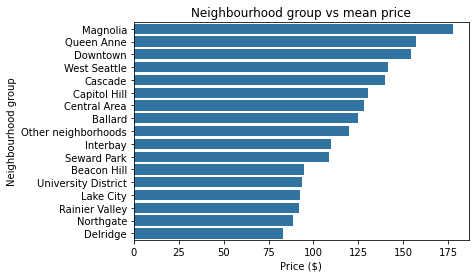

In [171]:
sb.barplot(data = df_listings, x = 'price', y = 'neighbourhood_group_cleansed', color = base_color, order = neighborhood_price_means_orders, ci = None).set(title='Neighbourhood group vs mean price', xlabel ="Price ($)", ylabel = "Neighbourhood group");

In [27]:
neighborhood_ratings_means = df_listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_rating'].sort_values(ascending=False)
neighborhood_ratings_means

/var/folders/6w/mqsftc_d4ns8fl0kcnv5h9hh0000gn/T/ipykernel_23701/1599360023.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_ratings_means = df_listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_rating'].sort_values(ascending=False)


neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Capitol Hill           94.184783
Beacon Hill            94.019417
Downtown               93.958333
Magnolia               93.787234
Interbay               93.777778
Cascade                92.461538
University District    88.437500
Name: review_scores_rating, dtype: float64

In [28]:
neighborhood_ratings_means_order = df_listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_rating'].sort_values(ascending=False).index
neighborhood_ratings_means_order

/var/folders/6w/mqsftc_d4ns8fl0kcnv5h9hh0000gn/T/ipykernel_23701/3057261492.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighborhood_ratings_means_order = df_listings.groupby(['neighbourhood_group_cleansed']).mean()['review_scores_rating'].sort_values(ascending=False).index


Index(['Central Area', 'West Seattle', 'Delridge', 'Ballard', 'Queen Anne',
       'Seward Park', 'Rainier Valley', 'Northgate', 'Other neighborhoods',
       'Lake City', 'Capitol Hill', 'Beacon Hill', 'Downtown', 'Magnolia',
       'Interbay', 'Cascade', 'University District'],
      dtype='object', name='neighbourhood_group_cleansed')

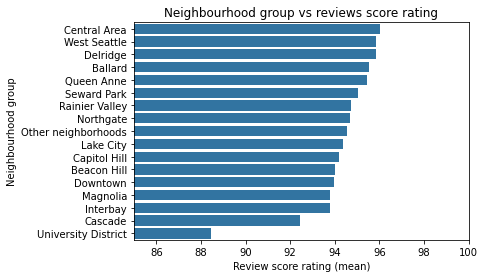

In [172]:
sb.barplot(data = df_listings, x = 'review_scores_rating', y = 'neighbourhood_group_cleansed', color = base_color, order = neighborhood_ratings_means_order, ci=None).set(title='Neighbourhood group vs reviews score rating', xlabel ="Review score rating (mean)", ylabel = "Neighbourhood group")
plt.xlim((85,100));

### How well can we predict a property's price? What aspects correlate well to price?

In [96]:
# First we will try to make a prediction using all the columns
X, y, test_score, train_score, lm_model, X_train, X_test, y_train, y_test = t.clean_fit_linear_mod(df_listings, 'price')

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [97]:
# The r2 (how well the data fits the regression model) is below
test_score

0.3446488837733144

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

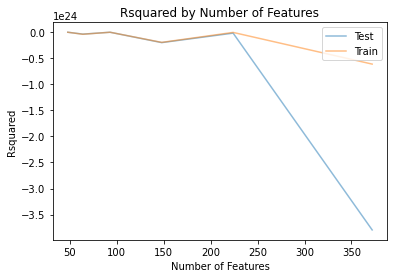

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [98]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [1000, 500, 250, 125, 60, 30]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [99]:
# Below we can kind the r2 for different cutoffs
r2_scores_test

[-1.9599396087759793,
 -3.6108271228224587e+22,
 -3.153560806038996e+19,
 -1.9892661564399356e+23,
 -1.6934621528318705e+22,
 -3.794238219355222e+24]

In [100]:
# We will analyze the coefficients to see if it helps us for feature selection and improving our model

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
1,scrape_id,1.876044e+15,1.876044e+15
37,"smart_location_Seattle, WA",1.020379e+13,1.020379e+13
36,city_Seattle,-1.020379e+13,1.020379e+13
5,host_total_listings_count,1.240700e+10,1.240700e+10
4,host_listings_count,-1.240700e+10,1.240700e+10
6,latitude,-5.458435e+01,5.458435e+01
8,bathrooms,3.040209e+01,3.040209e+01
33,host_acceptance_rate_100%,-2.964351e+01,2.964351e+01
40,room_type_Private room,-2.957232e+01,2.957232e+01
9,bedrooms,2.345370e+01,2.345370e+01


In [104]:
# Now let's continue analyzing how other numerical variables are correlated with price
num_vars = df_listings.select_dtypes(include=['float', 'int']).columns
num_vars

Index(['id', 'scrape_id', 'host_id', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [103]:
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.replace("%", "")
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].astype(float)

<AxesSubplot:>

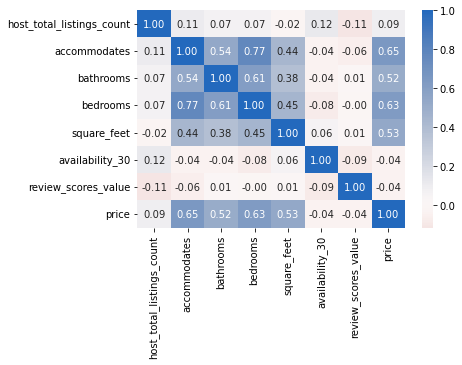

In [109]:
df_listings_cor = df_listings[["host_total_listings_count", "accommodates", "bathrooms", "bedrooms", "square_feet", "availability_30", "review_scores_value", "price"]]
sb.heatmap(df_listings_cor.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

In [113]:
df_listings_modified = df_listings[["square_feet", "bedrooms", "bathrooms", "accommodates", "neighbourhood_group_cleansed","price"]]

In [114]:
df_listings_modified

,square_feet,bedrooms,bathrooms,accommodates,neighbourhood_group_cleansed,price
0,NaN,1.0,1.0,4,Queen Anne,85.0
1,NaN,1.0,1.0,4,Queen Anne,150.0
2,NaN,5.0,4.5,11,Queen Anne,975.0
3,NaN,0.0,1.0,3,Queen Anne,100.0
4,NaN,3.0,2.0,6,Queen Anne,450.0
...,...,...,...,...,...,...
3813,NaN,3.0,2.0,6,Other neighborhoods,359.0
3814,NaN,1.0,1.0,4,Capitol Hill,79.0
3815,NaN,1.0,1.0,2,Rainier Valley,93.0
3816,NaN,0.0,1.0,2,Capitol Hill,99.0


In [115]:
cutoffs = [1000, 500, 250, 125, 60, 30]

In [116]:
X, y, test_score, train_score, lm_model, X_train, X_test, y_train, y_test = t.clean_fit_linear_mod(df_listings_modified, 'price')

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [117]:
# Using only numerical columns that have a moderate correlation to price, the r2 increased from 0.34 to 0.54
test_score

0.5410572463602468

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

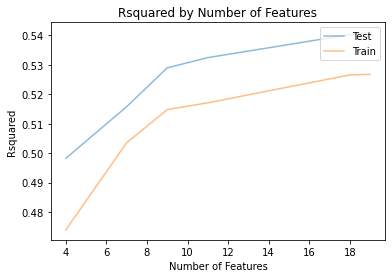

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [118]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [44]:
# We can see that as the cuttofs get lower, and we can use more features for our prediction, our results improve.
r2_scores_test

[0.47224913128275836,
 0.49562440939820773,
 0.5079854798995739,
 0.5110112496813407,
 0.5202904898084402,
 0.5208446995674159]

In [119]:
# We can see that there are some neighbourhoods, such as Downtown, Queen Anne, Cascade, North Gate and Magnolia,
# that have a high impact on price.

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
9,neighbourhood_group_cleansed_Downtown,43.303386,43.303386
14,neighbourhood_group_cleansed_Queen Anne,33.866516,33.866516
6,neighbourhood_group_cleansed_Cascade,33.648108,33.648108
12,neighbourhood_group_cleansed_Northgate,-32.011794,32.011794
11,neighbourhood_group_cleansed_Magnolia,31.481802,31.481802
1,bedrooms,27.703767,27.703767
2,bathrooms,26.164398,26.164398
5,neighbourhood_group_cleansed_Capitol Hill,24.737613,24.737613
15,neighbourhood_group_cleansed_Rainier Valley,-22.677126,22.677126
8,neighbourhood_group_cleansed_Delridge,-18.619324,18.619324


The following graphs show some features like bedrooms and square feet, that have a moderate correlation with price.

Text(0.5, 1.0, 'Price vs bedrooms')

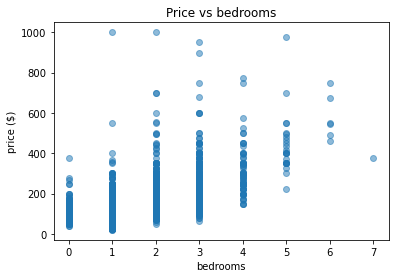

In [174]:
plt.scatter(data = df_listings, x = 'bedrooms', y = 'price', alpha = 0.5)
# plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlabel('bedrooms')
plt.ylabel('price ($)')
plt.title("Price vs bedrooms")

Text(0.5, 1.0, 'Price vs square feet')

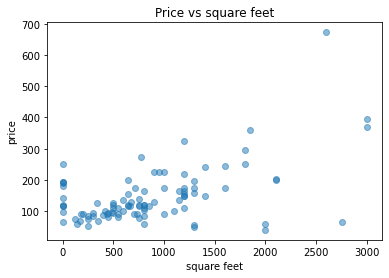

In [177]:
plt.scatter(data = df_listings, x = 'square_feet', y = 'price', alpha = 0.5)
# plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlabel('square feet')
plt.ylabel('price')
plt.title("Price vs square feet")

### How well can we predict a property's availability? What aspects correlate well to availability?

In [123]:
num_vars = df_listings.select_dtypes(include=['float', 'int']).columns
num_vars

Index(['id', 'scrape_id', 'host_id', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [128]:
# First, we will use all the columns to try to predict availability
X, y, test_score, train_score, lm_model, X_train, X_test, y_train, y_test = t.clean_fit_linear_mod(df_listings, 'availability_30')

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [129]:
# We can see that the results are not very good, and that we have a low r2
test_score

0.19759541624653265

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

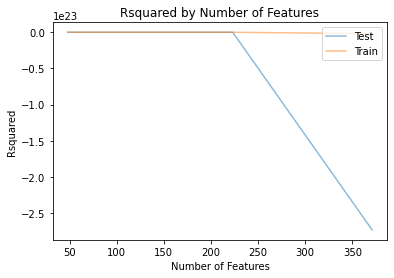

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [130]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [131]:
# We will take a look at coefficients, to see if any particular variable correlates well with availability
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
1,scrape_id,-3.658619e+14,3.658619e+14
37,"smart_location_Seattle, WA",1.068609e+12,1.068609e+12
36,city_Seattle,-1.068609e+12,1.068609e+12
6,host_total_listings_count,-5.654818e+10,5.654818e+10
5,host_listings_count,5.654818e+10,5.654818e+10
4,host_acceptance_rate,-6.324598e+00,6.324598e+00
7,latitude,4.281245e+00,4.281245e+00
34,host_has_profile_pic_t,-1.627914e+00,1.627914e+00
17,availability_60,8.408421e-01,8.408421e-01
27,review_scores_value,-4.515963e-01,4.515963e-01


In [139]:
# We will try again, but this time using just the numerical variables
df_listings_num = df_listings.select_dtypes(include=['float', 'int'])
df_listings_num

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,96.0,100.0,3.0,3.0,47.636289,-122.371025,4,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,98.0,100.0,6.0,6.0,47.639123,-122.365666,4,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,67.0,100.0,2.0,2.0,47.629724,-122.369483,11,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,NaN,NaN,1.0,1.0,47.638473,-122.369279,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,100.0,NaN,2.0,2.0,47.632918,-122.372471,6,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,99.0,100.0,354.0,354.0,47.664295,-122.359170,6,...,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,8,0.30
3814,8902327,20160104002432,46566046,100.0,100.0,1.0,1.0,47.649552,-122.318309,4,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1,2.00
3815,10267360,20160104002432,52791370,NaN,NaN,1.0,1.0,47.508453,-122.240607,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3816,9604740,20160104002432,25522052,100.0,NaN,1.0,1.0,47.632335,-122.275530,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [159]:
X, y, test_score, train_score, lm_model, X_train, X_test, y_train, y_test = t.clean_fit_linear_mod(df_listings_num, 'availability_30')

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

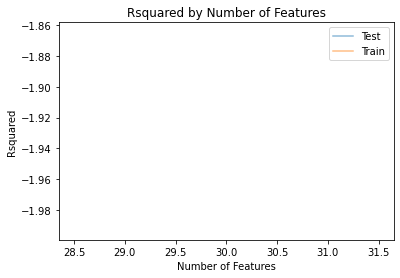

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [145]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [160]:
# We can see the results have gotten worse, using just the numerical variables
test_score

-1.9929213408247786

In [146]:
# We will take a look again at coefficients, to see if any particular variable correlates well with availability
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
1,scrape_id,4.932684e+14,4.932684e+14
5,host_listings_count,3.176887e+10,3.176887e+10
6,host_total_listings_count,-3.176887e+10,3.176887e+10
4,host_acceptance_rate,-6.215948e+00,6.215948e+00
7,latitude,4.024878e+00,4.024878e+00
17,availability_60,8.424262e-01,8.424262e-01
27,review_scores_value,-4.565661e-01,4.565661e-01
25,review_scores_communication,4.386372e-01,4.386372e-01
18,availability_90,-2.496550e-01,2.496550e-01
29,reviews_per_month,-1.564462e-01,1.564462e-01


In [152]:
# Using what we saw on the coefficients and common sense we will search for variables correlated with availability
df_listings_corr_3 = df_listings[['availability_30','host_total_listings_count', 'host_acceptance_rate', 'latitude','review_scores_value', 'accommodates', 'bedrooms', 'beds']]

<AxesSubplot:>

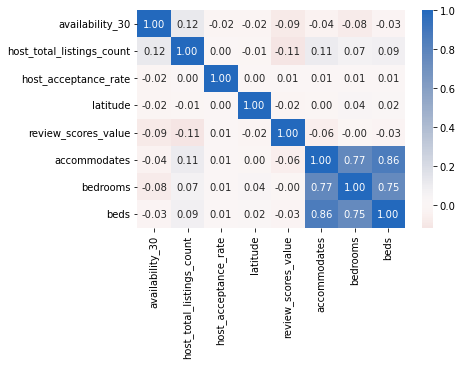

In [153]:
sb.heatmap(df_listings_corr_3.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

In [150]:
df_listings_corr_4 = df_listings[['availability_30','bathrooms', 'guests_included', 'minimum_nights', 'maximum_nights']]

<AxesSubplot:>

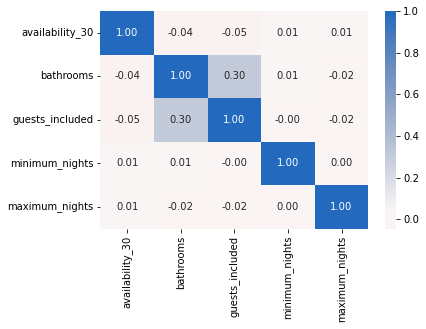

In [151]:
sb.heatmap(df_listings_corr_4.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

In [154]:
# Although all variables have a weak correlations, we will try running our model with the variables that show
# a higher correlation, and using the neighbourhood_group_cleansed variable

df_listings_avail_pred = df_listings[['availability_30', 'host_total_listings_count', 'review_scores_value', 'bedrooms', 'neighbourhood_group_cleansed']]

In [155]:
X, y, test_score, train_score, lm_model, X_train, X_test, y_train, y_test = t.clean_fit_linear_mod(df_listings_avail_pred, 'availability_30')

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [156]:
# We can see that the results are significantly worse, so the feature selection didn't work in this case.
test_score

0.020704352402406867

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

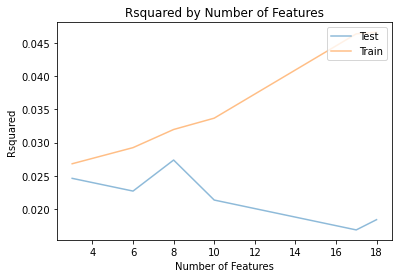

/Users/javierchapto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [157]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [158]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
7,neighbourhood_group_cleansed_Queen Anne,-2.453859,2.453859
3,neighbourhood_group_cleansed_Capitol Hill,-2.297594,2.297594
1,review_scores_value,-1.463723,1.463723
4,neighbourhood_group_cleansed_Central Area,-1.260232,1.260232
5,neighbourhood_group_cleansed_Downtown,-1.252645,1.252645
2,bedrooms,-1.164803,1.164803
6,neighbourhood_group_cleansed_Other neighborhoods,-0.650731,0.650731
0,host_total_listings_count,0.049012,0.049012


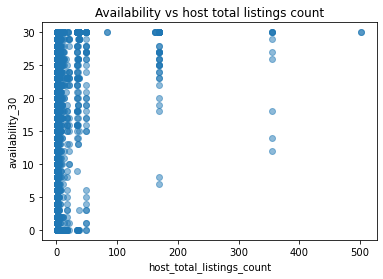

In [178]:
# The correlation of availavility with other variables is weak, with host_total_listings_count being one of the highest.
plt.scatter(data = df_listings, x = 'host_total_listings_count', y = 'availability_30', alpha = 0.5)
plt.xlabel('host_total_listings_count')
plt.ylabel('availability_30')
plt.title("Availability vs host total listings count");